In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matyplotlib -rf
plt.rc('font', family='NanumBarunGothic')

Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


SAMPLE: (np.int64(1), np.int64(1), 'AC-CAR-16P-2024')


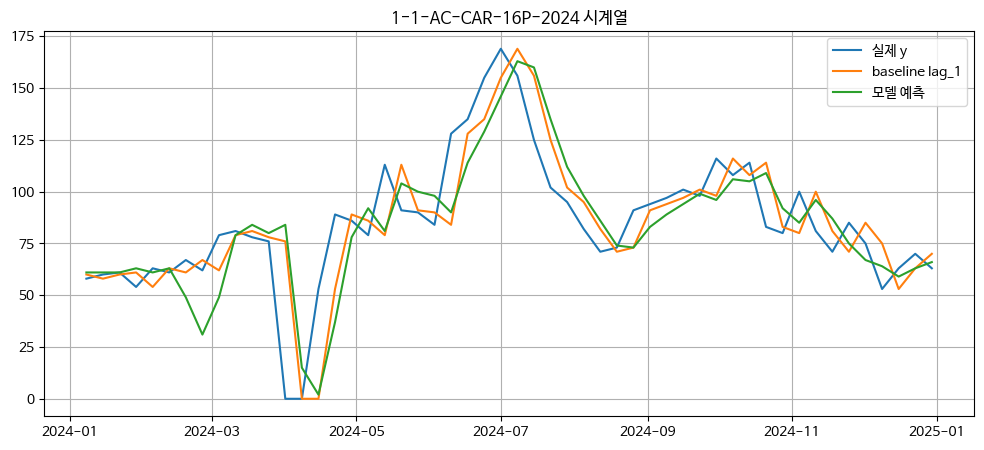

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


BASE = Path("../app/data_pipeline")
te = pd.read_csv(BASE / "features_test.csv", parse_dates=["target_date"])
pred = pd.read_csv(BASE / "predictions.csv", parse_dates=["target_date"])

df = te.merge(
    pred[["warehouse_id","store_id","sku_id","target_date","y_pred"]],
    on=["warehouse_id","store_id","sku_id","target_date"],
    how="left"
)

# 임의 SKU 하나 골라보기
sample_key = df.groupby(["warehouse_id","store_id","sku_id"]).size().idxmax()
wh, st, sku = sample_key
print("SAMPLE:", sample_key)

sub = df[(df["warehouse_id"]==wh) & (df["store_id"]==st) & (df["sku_id"]==sku)].copy()
sub = sub.sort_values("target_date")

plt.figure(figsize=(12,5))
plt.plot(sub["target_date"], sub["y"], label="실제 y")
plt.plot(sub["target_date"], sub["lag_1"], label="baseline lag_1")
plt.plot(sub["target_date"], sub["y_pred"], label="모델 예측")
plt.legend()
plt.title(f"{wh}-{st}-{sku} 시계열")
plt.show()


In [49]:
from pathlib import Path
import pandas as pd

BASE = Path("../app/data_pipeline")
tr = pd.read_csv(BASE / "features_train.csv", parse_dates=["target_date"])
te = pd.read_csv(BASE / "features_test.csv", parse_dates=["target_date"])

print("TRAIN 기간:", tr["target_date"].min(), " ~ ", tr["target_date"].max())
print("TEST  기간:", te["target_date"].min(), " ~ ", te["target_date"].max())


TRAIN 기간: 2016-02-29 00:00:00  ~  2024-01-01 00:00:00
TEST  기간: 2024-01-08 00:00:00  ~  2024-12-30 00:00:00


In [50]:
print(
    te.groupby(["warehouse_id","store_id","sku_id"])["target_date"]
      .agg(["min","max","count"])
      .head()
)


                                                  min        max  count
warehouse_id store_id sku_id                                           
1            1        AC-CAR-16P-2024      2024-01-08 2024-12-30     52
                      AC-LG-STAND-18P-2024 2024-01-08 2024-12-30     52
                      AC-LG-WS-6P-2024     2024-01-08 2024-12-30     52
                      AC-SAM-WF-18P-2024   2024-01-08 2024-12-30     52
                      AIR-LG-PURI-58-2024  2024-01-08 2024-12-30     52


In [51]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True

# 노트북 위치 기준: python-server/notebook
DATA_DIR = Path("../app/data_pipeline")

pred_path = DATA_DIR / "predictions.csv"
test_path = DATA_DIR / "features_test.csv"   # baseline(lag_1) 비교용

print(pred_path, pred_path.exists())
print(test_path, test_path.exists())

pred = pd.read_csv(pred_path, parse_dates=["target_date"])
test = pd.read_csv(test_path, parse_dates=["target_date"])

pred.head(), test.head()



..\app\data_pipeline\predictions.csv True
..\app\data_pipeline\features_test.csv True


(   warehouse_id  store_id           sku_id region target_date     y  y_pred
 0             1         1  AC-CAR-16P-2024   본사창고  2024-01-08  58.0      61
 1             1         1  AC-CAR-16P-2024   본사창고  2024-01-15  60.0      61
 2             1         1  AC-CAR-16P-2024   본사창고  2024-01-22  61.0      61
 3             1         1  AC-CAR-16P-2024   본사창고  2024-01-29  54.0      63
 4             1         1  AC-CAR-16P-2024   본사창고  2024-02-05  63.0      61,
   target_date  warehouse_id  store_id           sku_id region cat_low  \
 0  2024-01-08             1         1  AC-CAR-16P-2024   본사창고     에어컨   
 1  2024-01-15             1         1  AC-CAR-16P-2024   본사창고     에어컨   
 2  2024-01-22             1         1  AC-CAR-16P-2024   본사창고     에어컨   
 3  2024-01-29             1         1  AC-CAR-16P-2024   본사창고     에어컨   
 4  2024-02-05             1         1  AC-CAR-16P-2024   본사창고     에어컨   
 
    actual_order_qty  lag_1  lag_2  lag_4  ...  back_to_school  avg_temp_c_ma4  \
 0       

In [52]:
ID_COLS = ["warehouse_id", "store_id", "sku_id", "region", "target_date"]

df = pred.merge(
    test[ID_COLS + ["lag_1"]] if "lag_1" in test.columns else test[ID_COLS],
    on=ID_COLS,
    how="left",
    suffixes=("", "_test")
)

# 에러 / 지표 컬럼 추가
df["abs_err"] = (df["y_pred"] - df["y"]).abs()
df["signed_err"] = df["y_pred"] - df["y"]
df["ape"] = np.where(df["y"] == 0, np.nan, df["abs_err"] / df["y"] * 100)

df.describe()[["y", "y_pred", "abs_err", "ape"]]


,y,y_pred,abs_err,ape
count,33800.000000,33800.000000,33800.000000,32240.000000
mean,130.477249,128.170444,16.132367,14.160433
min,0.000000,0.000000,0.000000,0.000000
25%,50.000000,50.000000,4.000000,4.651163
50%,99.000000,98.000000,9.000000,10.122815
75%,175.000000,172.000000,20.000000,18.467291
max,1161.000000,939.000000,663.000000,150.000000
std,118.687100,115.454710,24.562315,14.624703


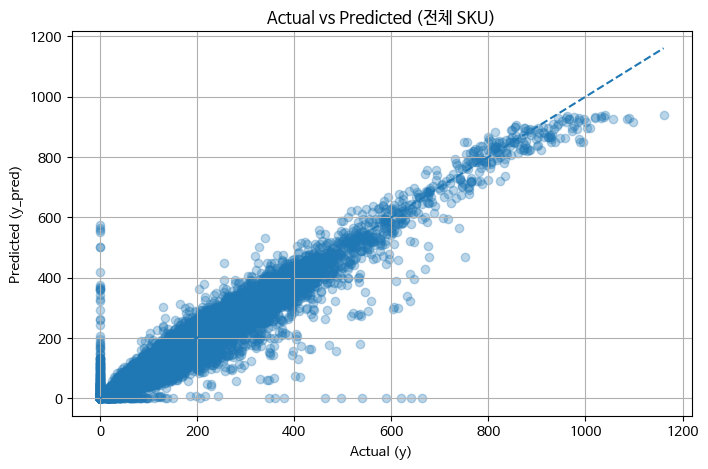

In [53]:
plt.figure()
plt.scatter(df["y"], df["y_pred"], alpha=0.3)
max_val = max(df["y"].max(), df["y_pred"].max())
plt.plot([0, max_val], [0, max_val], linestyle="--")
plt.xlabel("Actual (y)")
plt.ylabel("Predicted (y_pred)")
plt.title("Actual vs Predicted (전체 SKU)")
plt.show()


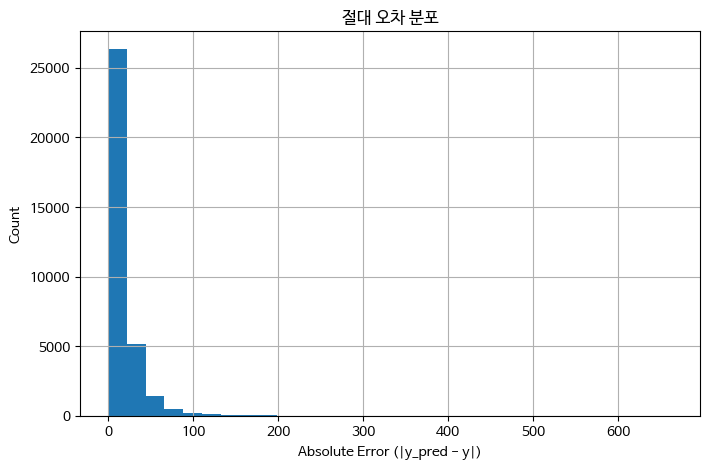

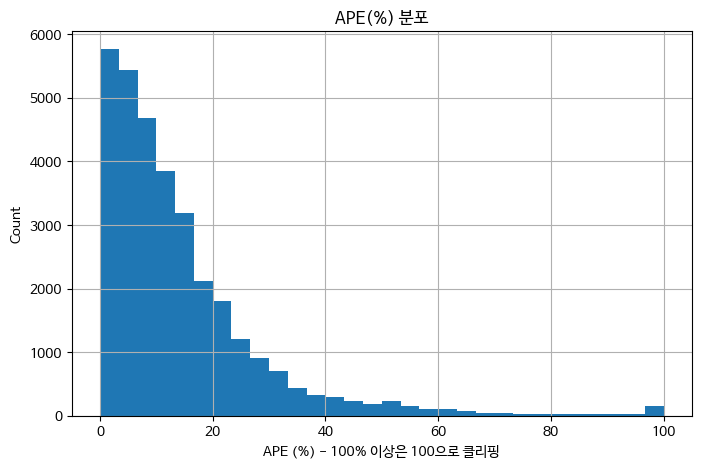

In [54]:
plt.figure()
df["abs_err"].hist(bins=30)
plt.xlabel("Absolute Error (|y_pred - y|)")
plt.ylabel("Count")
plt.title("절대 오차 분포")
plt.show()

plt.figure()
df["ape"].dropna().clip(upper=100).hist(bins=30)
plt.xlabel("APE (%) - 100% 이상은 100으로 클리핑")
plt.ylabel("Count")
plt.title("APE(%) 분포")
plt.show()


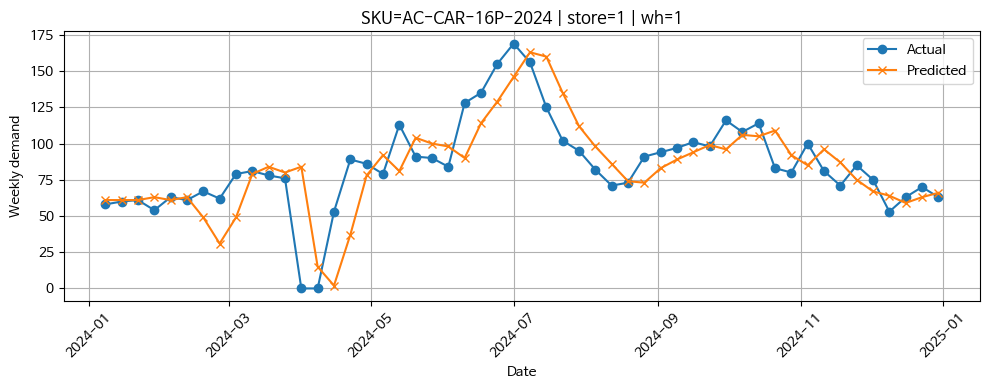

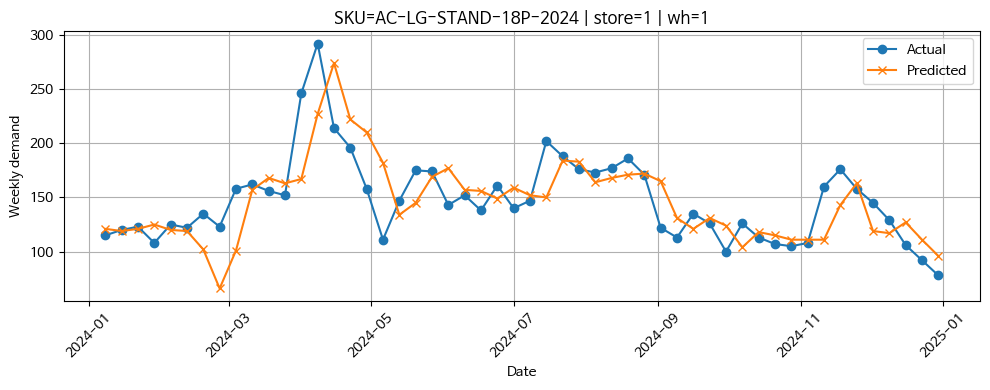

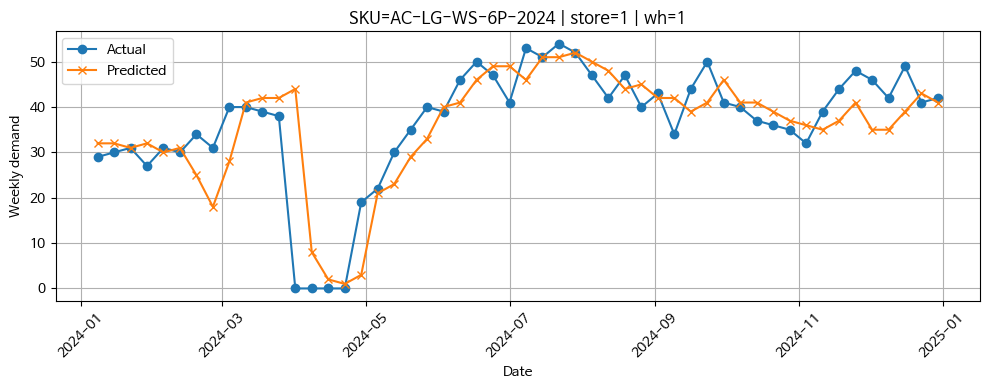

In [55]:
def plot_sku_timeseries(sku_id, store_id=None, warehouse_id=None):
    d = df[df["sku_id"] == sku_id].copy()
    if store_id is not None:
        d = d[d["store_id"] == store_id]
    if warehouse_id is not None:
        d = d[d["warehouse_id"] == warehouse_id]
        
    d = d.sort_values("target_date")
    if d.empty:
        print("해당 조건에 맞는 데이터가 없습니다.")
        return
    
    plt.figure(figsize=(10,4))
    plt.plot(d["target_date"], d["y"], marker="o", label="Actual")
    plt.plot(d["target_date"], d["y_pred"], marker="x", label="Predicted")
    plt.xlabel("Date")
    plt.ylabel("Weekly demand")
    title = f"SKU={sku_id}"
    if store_id is not None:
        title += f" | store={store_id}"
    if warehouse_id is not None:
        title += f" | wh={warehouse_id}"
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 예시: 너가 보여준 것들
plot_sku_timeseries("AC-CAR-16P-2024", store_id=1, warehouse_id=1)
plot_sku_timeseries("AC-LG-STAND-18P-2024", store_id=1, warehouse_id=1)
plot_sku_timeseries("AC-LG-WS-6P-2024", store_id=1, warehouse_id=1)


In [56]:
# SKU별 MAPE
sku_metrics = (
    df.groupby(["warehouse_id", "store_id", "sku_id"], as_index=False)
      .apply(lambda g: pd.Series({
          "n": len(g),
          "mape": g["ape"].mean(skipna=True),
          "mae": g["abs_err"].mean()
      }))
)

# MAPE 기준 상위/하위 10개
best_10 = sku_metrics.sort_values("mape").head(10)
worst_10 = sku_metrics.sort_values("mape").tail(10)

print("✅ MAPE가 가장 낮은(잘 맞는) 10개 SKU")
display(best_10)

print("⚠️ MAPE가 가장 높은(안 맞는) 10개 SKU")
display(worst_10)


✅ MAPE가 가장 낮은(잘 맞는) 10개 SKU


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11692\1807763648.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


,warehouse_id,store_id,sku_id,n,mape,mae
156,1,3,MIX-CUI-HAND-2024,52.0,1.774830,19.519231
546,1,9,MIX-CUI-HAND-2024,52.0,1.921699,18.076923
611,1,10,MIX-CUI-HAND-2024,52.0,2.839069,19.923077
351,1,6,MIX-CUI-HAND-2024,52.0,4.071205,14.173077
26,1,1,MIX-CUI-HAND-2024,52.0,4.439383,16.057692
221,1,4,MIX-CUI-HAND-2024,52.0,4.678003,18.596154
481,1,8,MIX-CUI-HAND-2024,52.0,5.018330,21.096154
91,1,2,MIX-CUI-HAND-2024,52.0,6.316144,22.153846
286,1,5,MIX-CUI-HAND-2024,52.0,6.362561,14.576923
416,1,7,MIX-CUI-HAND-2024,52.0,8.303570,13.807692


⚠️ MAPE가 가장 높은(안 맞는) 10개 SKU


,warehouse_id,store_id,sku_id,n,mape,mae
184,1,3,TV-XIA-LED-50-2024,52.0,24.175064,4.000000
311,1,5,TV-LG-LED-55-2023,52.0,24.493550,7.538462
193,1,3,WM-SAM-GRN-24K-2024,52.0,24.562791,15.865385
16,1,1,DRY-WHP-10K-2023,52.0,26.063973,5.807692
356,1,6,MW-DAE-25L-2023,52.0,26.088870,13.615385
291,1,5,MW-DAE-25L-2023,52.0,26.857162,14.596154
406,1,7,DRY-WHP-10K-2023,52.0,27.763601,3.942308
506,1,8,TV-LG-LED-55-2023,52.0,29.333307,12.615385
444,1,7,TV-XIA-LED-50-2024,52.0,33.383180,2.480769
421,1,7,MW-DAE-25L-2023,52.0,33.674151,14.365385


모델 vs baseline(lag_1) 전체 평균
 - Model MAE : 16.132366863905325
 - Base  MAE : 15.263934911242604
 - Model MAPE: 14.16043268480646
 - Base  MAPE: 13.324100762258992


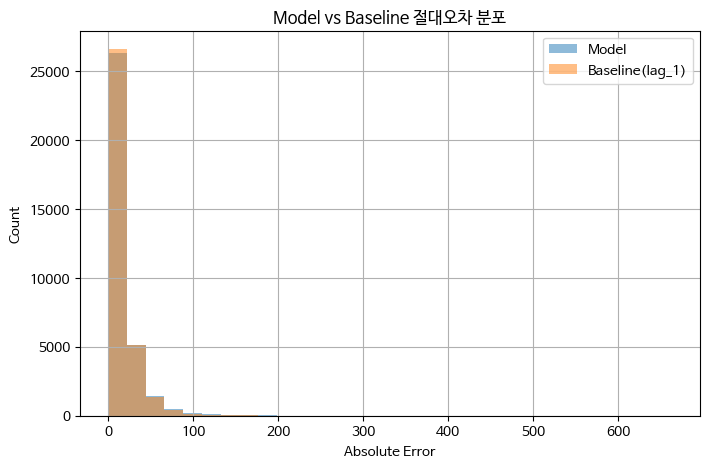

In [57]:
# lag_1이 있는 row만
if "lag_1" in df.columns:
    d_base = df[~df["lag_1"].isna()].copy()

    d_base["abs_err_baseline"] = (d_base["lag_1"] - d_base["y"]).abs()
    d_base["ape_baseline"] = np.where(
        d_base["y"] == 0, np.nan,
        d_base["abs_err_baseline"] / d_base["y"] * 100
    )

    print("모델 vs baseline(lag_1) 전체 평균")
    print(" - Model MAE :", d_base["abs_err"].mean())
    print(" - Base  MAE :", d_base["abs_err_baseline"].mean())
    print(" - Model MAPE:", d_base["ape"].mean())
    print(" - Base  MAPE:", d_base["ape_baseline"].mean())

    # 두 모델의 오차 분포 비교
    plt.figure()
    d_base["abs_err"].hist(alpha=0.5, bins=30, label="Model")
    d_base["abs_err_baseline"].hist(alpha=0.5, bins=30, label="Baseline(lag_1)")
    plt.xlabel("Absolute Error")
    plt.ylabel("Count")
    plt.title("Model vs Baseline 절대오차 분포")
    plt.legend()
    plt.show()
else:
    print("features_test에 lag_1이 없어서 baseline 비교를 건너뜁니다.")


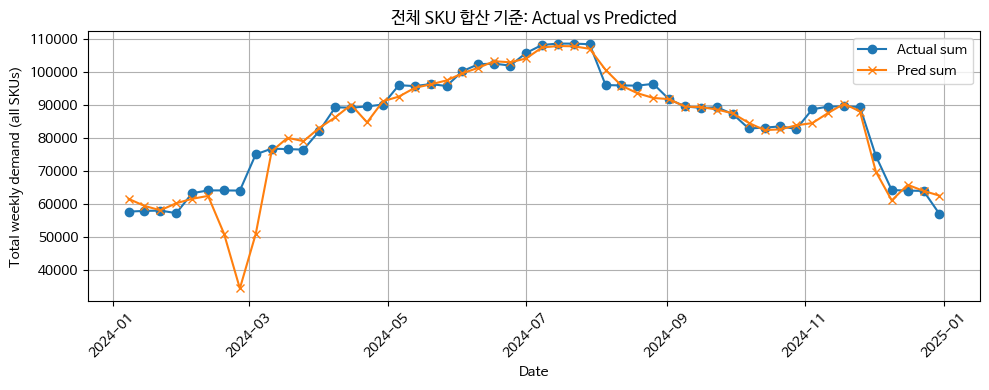

In [58]:
agg = (
    df.groupby("target_date", as_index=False)
      .agg(y_sum=("y", "sum"), y_pred_sum=("y_pred", "sum"))
      .sort_values("target_date")
)

plt.figure(figsize=(10,4))
plt.plot(agg["target_date"], agg["y_sum"], label="Actual sum", marker="o")
plt.plot(agg["target_date"], agg["y_pred_sum"], label="Pred sum", marker="x")
plt.xlabel("Date")
plt.ylabel("Total weekly demand (all SKUs)")
plt.title("전체 SKU 합산 기준: Actual vs Predicted")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


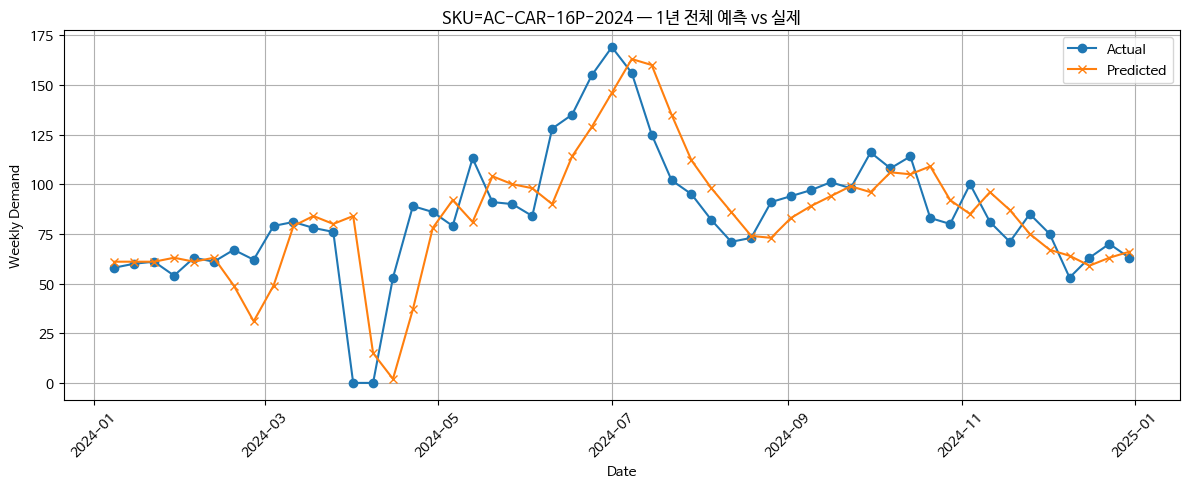

In [59]:
def plot_sku_timeseries_full_year(sku_id, store_id=None, warehouse_id=None):
    d = df[df["sku_id"] == sku_id].copy()

    if store_id is not None:
        d = d[d["store_id"] == store_id]
    if warehouse_id is not None:
        d = d[d["warehouse_id"] == warehouse_id]

    d = d.sort_values("target_date")

    if d.empty:
        print("데이터 없음.")
        return

    plt.figure(figsize=(12,5))
    plt.plot(d["target_date"], d["y"], marker="o", label="Actual")
    plt.plot(d["target_date"], d["y_pred"], marker="x", label="Predicted")
    plt.xlabel("Date")
    plt.ylabel("Weekly Demand")
    plt.title(f"SKU={sku_id} — 1년 전체 예측 vs 실제")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 예시 실행
plot_sku_timeseries_full_year("AC-CAR-16P-2024", store_id=1, warehouse_id=1)
